# Neural Network

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns

## Training Problem

The problem I'll use to try a NN is the same as a Logistic Regression problem: simple binary classification. <br>
The following are training examples: 

In [161]:
m = 30
x1_train = [2, 0.8, 0.9, 0.95, 1.5, 1.6, 3, 2.8, 1, 1.4, 2.3, 3.4, 1.2, 0.5, 2, 2.1, 4.1, 5, 6, 4, 4.5, 5.3, 6.4, 6, 5.2, 5.3, 5.4, 6, 5.8, 6.1]
x2_train = [1, 3, 4.2, 6, 5, 4, 2, 3.5, 1.1, 3, 2, 2.8, 2.1, 0.7, 2.6, 2.5, 7, 8, 6.5, 6, 6.5, 7.8, 8.4, 7.5, 5, 5.5, 4, 5, 6.2, 4.5]
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(1, len(x1_train))
x0 = np.ones(len(x1_train))
X = np.array([x0, x1_train, x2_train])

In [162]:
print(f"Training examples: {m}")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

Training examples: 30
X shape: (3, 30)
Y shape: (1, 30)


The NN will need to correctly find the **decision boundary** for the problem plotted below. 

<AxesSubplot:>

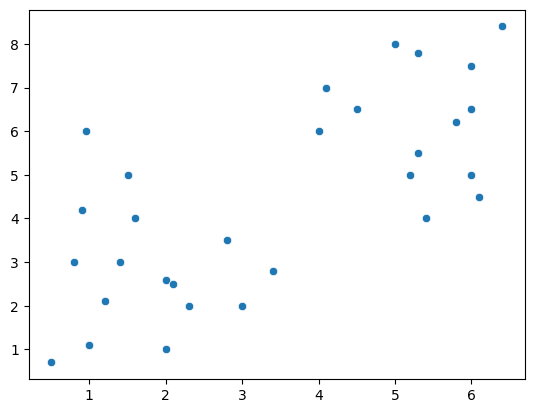

In [163]:
sns.scatterplot(x = x1_train, y = x2_train)

---
## Training the NN

Neural Networks's neurons are basically logistic regressors, that are **activated** based on the function, $h_{\Theta}(x)$, defined as follows: 
$$ 
h_{\Theta}(x) = \frac{1}{1 + e^{-z(x)}}
$$
where $z(x)$ is any polynomial in a vector x, and can be defined as: 
$$
z(X) = \Theta X
$$


In this notebook, I'll build a NN with a **single hidden layer** of **two nodes** (plus the standard "fixed term" node). <br>
For each neuron in the **hidden layer**, we calculate $z(X)$ as above, considering the following. <br>

There will be in total 3 layers:
 1. $A^0$, an $\mathbb{R}^{3,m}$ matrix, which is the input layer $X$, composed of three nodes ($x_0, x_1, x_2$ where $x_0$ is a just 1) with $m$ training examples
 2. $A^1$, an $\mathbb{R}^{3,m}$ matrix, which is the hidden layer, composed of two nodes plus a fixed node (1), with $m$ training examples
 3. $A^2$, an $\mathbb{R}^{1,m}$ vector, which is the output layer, composed of a single node, with $m$ training example output

That means that: 
 * $X$ must be a **matrix** $\mathbb{R}^{3,m}$ where each **row** is a feature ($x_0, x_1, x_2$) and each **column** is a training example. So training examples are organized in rows for each feature.
 * $\Theta^{(0)}$ must be a **matrix** $\mathbb{R}^{2, 3}$ 
 * $\Theta^{(1)}$ must be a **vector** $\mathbb{R}^{1, 3}$. The $3$ comes from the fact that we add one node ($a_0$ with fixed value $1$) to the hidden layer 

$$
\Theta^{(0)}=
\begin{bmatrix}
\theta^{(0)}_{0,0} & \theta^{(0)}_{0,1} & \theta^{(0)}_{0,2} \\
\theta^{(0)}_{1,0} & \theta^{(0)}_{1,1} & \theta^{(0)}_{1,2}
\end{bmatrix}
\textrm{ and } \Theta^{(1)}=
\begin{bmatrix}
\theta^{(1)}_{0,0} & \theta^{(1)}_{0,1} & \theta^{(0)}_{0,2}\\
\end{bmatrix}
$$

where $\theta^{(0)}_{a, b}$ is the **weight** of the link between the input neuron $b$ and the output neuron (in this case hidden layer) $a$  

That means that $\Theta^{(0)}X$ is: 
$$ 
\Theta^{(0)}X = 
\begin{bmatrix}
\theta^{(0)}_{0,0} & \theta^{(0)}_{0,1} & \theta^{(0)}_{0,2} \\
\theta^{(0)}_{1,0} & \theta^{(0)}_{1,1} & \theta^{(0)}_{1,2}
\end{bmatrix}
\begin{bmatrix}
x_{0,0} & x_{0,1} & ... & x_{0,m - 1} \\
x_{1,0} & x_{1,1} & ... & x_{1,m - 1} \\
x_{2,0} & x_{2,1} & ... & x_{2,m - 1} \\
\end{bmatrix}
=\mathbb{R}^{2,m}
$$

In [164]:
def z(A, Theta):
    # print(f"z() calculation. Multiplying A {A.shape} and Theta {Theta.shape}")
    return np.matmul(Theta, A)

In [165]:
def h(A, Theta): 
    return 1 / (1.0 + np.exp(-1 * z(A, Theta)))

I'm also now defining a `one_or_zero_h()` function that instead of just applying a logistic regressor, will give me 1 when the output is >= 0.5, 0 otherwise. <br>
That way I'm expecting to minimize the error quite fast. 

In [398]:
def one_or_zero_h(A, Theta):
    
    R = h(A, Theta)
    
    return np.where(R > 0.5, 1, 0)

### Forward Propagation

That means that, with **Forward Propagation** we will have: 

$$
A^{(0)} = X \textrm{ and is } \mathbb{R}^{3,m} \\
A^{(1)} = h(A^{(0)}, \Theta^{(0)}) \textrm{ and is } \mathbb{R}^{2, m} (=\mathbb{R}^{2, 3} * \mathbb{R}^{3,m})
$$

Now, after $A^{(1)}$ has been calculated, you need to add a vector of 1s to it so that it goes from being $\mathbb{R}^{2, m}$ to $\mathbb{R}^{3, m}$, where the first row $A^{(1)}_0$ is only **ones**. <br>
So that now, $A^{(2)}$ will be: 

$$
A^{(2)} = h(A^{(1)}, \Theta^{(1)}) \textrm{ and is } \mathbb{R}^{1, m} (=\mathbb{R}^{1, 3} * \mathbb{R}^{3, m})
$$

In [402]:
def forward_propagation(X, Theta0, Theta1, m, use_one_or_zero_h = False): 
    '''
    Forward Propagation calculates A1 and A2, by applying the above formulas
    '''
    A0 = X
    
    A1 = h(A0, Theta0)

    # Add a vector of ones to A1 (+1 neuron)
    A1 = np.insert(A1, 0, np.ones(m), axis = 0)
    
    if (use_one_or_zero_h): 
        A2 = one_or_zero_h(A1, Theta1)
    else:
        A2 = h(A1, Theta1)
    
    # print(f"Forward Propagation done.\nA0 shape is {A0.shape}\nA1 shape is {A1.shape}\nA2 shape is {A2.shape}")

    return (A1, A2)

Let's test the forward propagation. <br>
We will use: 
$$
\Theta^{(0)} = 
\begin{bmatrix}
3 & 3 & 3 \\
2 & 2 & 2
\end{bmatrix}
\textrm{ and }
\Theta^{(1)} = 
\begin{bmatrix}
3 & 3 & 3
\end{bmatrix}
$$

In [369]:
Theta0 = np.array([[3, 3, 3], [2, 2, 2]])
Theta1 = np.array([[3, 3, 3]])

A0 = X
A1, A2 = forward_propagation(X, Theta0, Theta1, 30)

### Backward Propagation

The first step of Backward Propagation is to calculate $\delta$ for each layer (except layer 0 - input layer).

So we will calculate: 
 * $\delta^{(1)}$ which will be $\mathbb{R}^{3, m}$
 * $\delta^{(2)}$ which will be $\mathbb{R}^{1, m}$

The following formulas will be used: 

$\delta^{(2)} = A^{(2)} - Y$

$\delta^{(1)} = (\Theta^{(1)})^T\delta^{(2)} .* A^{(1)}.*(1-A^{(1)})$

Remember that $.*$ is the ***element-wise*** multiplication. 

In [370]:
def calculate_deltas(A1, A2, Theta1, Y): 
    
    delta2 = A2 - Y
    
    delta1 = np.matmul(np.transpose(Theta1), delta2) * A1 * (1 - A1)
    
    # print(f"Deltas Calculated.\ndelta1 shape is {delta1.shape}\ndelta2 shape is {delta2.shape}")
    # print(f"Y: {Y[0, 0]} - A2: {A2[0, 0]}")
    
    return (delta1, delta2)


Let's test the $\delta$ calculation

In [371]:
delta1, delta2 = calculate_deltas(A1, A2, Theta1, Y)

Now we need to calculate the derivatives $\frac{\delta J(\Theta)}{\delta \Theta^{(l)}_{i, j}}$
We do that using the formula: 

$\frac{\delta J(\Theta)}{\delta \Theta^{(l)}_{i, j}} = a^{(l)}_{j} \delta^{(l+1)}_{i}$ which, in **matrix form**, is equivalent to: 
$\frac{\delta J(\Theta)}{\delta \Theta^{(l)}} = \delta^{(l+1)} (A^{(l)})^T$

Which means that: 

$\frac{\delta J(\Theta)}{\delta \Theta^{(1)}} = \frac{1}{m} A^{(1)}(\delta^{(2)})^T$ which will be of shape $\mathbb{R}^{3, 1}$

$\frac{\delta J(\Theta)}{\delta \Theta^{(0)}} = \frac{1}{m} A^{(0)}(\delta^{(1)})^T$ which will be of shape $\mathbb{R}^{3, 3}$

That makes sense, since the derivatives calculate a single number for each **weight** of the Neural network, and the weights are:
 * 3 weights for the three links between the (2+1) nodes of the hidden layer and the single node of the output layer
 * 9 weights for the 9 links between the 3 nodes of the input layer and the (2+1) nodes of the hidden layer
 
**But** note that we will **discard the derivatives** of the link between the input layer and **node 0** of the hidden layer (since that is a constant node that has no link to the input layer)

In [372]:
def calculate_cost_derivatives(A0, A1, delta1, delta2): 
    
    der1 = np.matmul(A1, np.transpose(delta2)) / m
    
    der0 = np.matmul(A0, np.transpose(delta1)) / m
    
    # print(f"Cost Derivatives calculated.\nder0 shape is {der0.shape}\nder1 shape is {der1.shape}")
    
    return (der0, der1)

Let's test the calculation of $\frac{\delta J(\Theta)}{\delta \Theta^{(l)}}$

In [373]:
der0, der1 = calculate_cost_derivatives(A0, A1, delta1, delta2)

# Drop the first column of der0 since it's not useful
der0 = der0[:, 1:]

print(f"First column of der0 dropped.\nder0 shape is now {der0.shape}")

First column of der0 dropped.
der0 shape is now (3, 2)


Now we should implement **Gradient Descent**

In [374]:
def gradient_descent(alpha, Theta0, Theta1, der0, der1): 
    
    Theta0 = Theta0 - alpha * np.transpose(der0)
        
    Theta1 = Theta1 - alpha * np.transpose(der1)

    return (Theta0, Theta1)

In [375]:
Theta0, Theta1 = gradient_descent(0.3, Theta0, Theta1, der0, der1)
Theta1

array([[2.84003708, 2.84005167, 2.84018534]])

### Putting it all together

The procedure should now be the following: 

For $n$ iterations: 
 1. Perform Forward Propagation
 2. Perform Backward Propagation, calculating the derivatives
 3. Descend the gradient

In [376]:
def J(X, Y, Theta0, Theta1, m):
    
    int_layer, Y_trained = forward_propagation(X, Theta0, Theta1, m)
    
    E = 0;
    for i in range(0, m):
        E += np.matmul(Y[:, i], np.log(Y_trained[:, i])) + (1 - Y[:, i]) * np.log(1.00000001 - Y_trained[:, i])
        
    return -E / m

A **very important** finding of trying out NN is that the **initialization of $\Theta$ (weights)** is extremely important!<br>
For example, by initializing weights to 
$$
\Theta^{(0)}=
\begin{bmatrix}
3 & 3 & 3 \\
5 & 5 & 5
\end{bmatrix}
\textrm{ and } \Theta^{(1)}=
\begin{bmatrix}
3 & 3 & 3
\end{bmatrix}
$$

I will find a local minimum that estimates everything to 0.46, which is completely suboptimal! <br>
By instead initializing $\Theta$ to all zeroes, I was able to find the global minimum.  

Also note that here I'm using the `one_or_zero_h` function to calculate $A^{(2)}$, which directly puts to 1 probabilities > 0.5. <br>
That's why we have `forward_propagation(X, Theta0, Theta1, m, True)` with the `True`. <br>
If you want to use *a more traditional approach* just use `False` (or don't put the parameter) and that will give you a probabilistic answer instead of a 1 or 0 answer. 

In [412]:
Theta0 = np.array([[0,0,0], [0,0,0]])
Theta1 = np.array([[0,0,0]])

A0 = X

iterations = 55
alpha = 0.6

er = np.zeros((2, iterations))

for i in range(0, iterations): 
    
    A1, A2 = forward_propagation(X, Theta0, Theta1, m, True)
    
    delta1, delta2 = calculate_deltas(A1, A2, Theta1, Y)
    
    #print(delta2[:,0])
    
    der0, der1 = calculate_cost_derivatives(A0, A1, delta1, delta2)
    der0 = der0[:, 1:]
    
    #print(der0)

    Theta0, Theta1 = gradient_descent(alpha, Theta0, Theta1, der0, der1)

    e = np.sum(A2 - Y) / m
    er[0, i] = i
    er[1, i] = e


<AxesSubplot:>

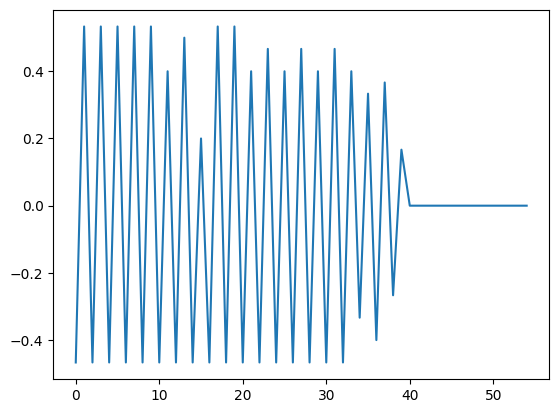

In [413]:
sns.lineplot(x = er[0], y = er[1])

In [408]:
# If you want to check the result on each training example: 
# pd.DataFrame(data = np.column_stack((Y[0,:], A2[0,:])), columns=["Y", "A2"])

### Trying the network on new data

If we try this network on an example where $(x_1, x_2) = (4, 1)$ we will get a correct estimation that the category is "0" (belongs to the lower cluster).

In [410]:
unseen_X = np.transpose(np.array([[1, 4, 1]]))
int_layer, predicted_Y = forward_propagation(unseen_X, Theta0, Theta1, 1, True)
print(predicted_Y)

[[0]]


In [415]:
unseen_X = np.transpose(np.array([[1, 2, 7]]))
int_layer, predicted_Y = forward_propagation(unseen_X, Theta0, Theta1, 1, True)
print(predicted_Y)

[[0]]


If we try this network on an example where $(x_1, x_2) = (4, 5)$ we will get a correct estimation that the category is "1" (belongs to the upper cluster).

In [411]:
unseen_X = np.transpose(np.array([[1, 4, 5]]))
int_layer, predicted_Y = forward_propagation(unseen_X, Theta0, Theta1, 1, True)
print(predicted_Y)

[[1]]
